<h1 align="center"> <strong>🎯 Naive Bayes - Complete Guide</strong> </h1>

A comprehensive guide to understanding and implementing Naive Bayes algorithms for classification tasks.

## Table of Contents

1. [Introduction to Naive Bayes](#1-introduction-to-naive-bayes)
2. [Mathematical Foundation](#2-mathematical-foundation)
3. [Types of Naive Bayes](#3-types-of-naive-bayes)
4. [Library Imports](#4-library-imports)
5. [Data Generation and Preparation](#5-data-generation-and-preparation)
6. [Implementation from Scratch](#6-implementation-from-scratch)
7. [Scikit-learn Implementation](#7-scikit-learn-implementation)
8. [Model Comparison and Visualization](#8-model-comparison-and-visualization)
9. [Hyperparameter Tuning](#9-hyperparameter-tuning)
10. [Real-world Applications](#10-real-world-applications)
11. [Advantages and Limitations](#11-advantages-and-limitations)
12. [Best Practices and Summary](#12-best-practices-and-summary)

## **1. Introduction to Naive Bayes**

Naive Bayes is a family of probabilistic algorithms based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features. Despite this strong assumption, Naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering.

### Key Characteristics:
- **Probabilistic**: Provides probability estimates for predictions
- **Fast**: Very efficient training and prediction
- **Simple**: Easy to understand and implement
- **Baseline**: Often used as a baseline classifier
- **Text Classification**: Particularly effective for text data

### When to Use Naive Bayes:
- Text classification (spam detection, sentiment analysis)
- Multi-class classification problems
- When you need probability estimates
- Limited training data
- Real-time predictions (fast inference)
- As a baseline model

## **2. Mathematical Foundation**

### Bayes' Theorem

The foundation of Naive Bayes is Bayes' theorem:

$$P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)}$$

Where:
- $P(y|X)$ = Posterior probability of class $y$ given features $X$
- $P(X|y)$ = Likelihood of features $X$ given class $y$
- $P(y)$ = Prior probability of class $y$
- $P(X)$ = Evidence (marginal probability of features)

### Naive Assumption

The "naive" assumption is that all features are conditionally independent:

$$P(X|y) = P(x_1, x_2, ..., x_n|y) = \prod_{i=1}^{n} P(x_i|y)$$

### Classification Rule

For classification, we predict the class with the highest posterior probability:

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i|y)$$

Since $P(X)$ is constant for all classes, we can ignore it in classification.

## **3. Types of Naive Bayes**

### 3.1 Gaussian Naive Bayes
- **Use Case**: Continuous features
- **Assumption**: Features follow a normal distribution
- **Likelihood**: $P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}\right)$

### 3.2 Multinomial Naive Bayes
- **Use Case**: Discrete features (counts, frequencies)
- **Common Application**: Text classification, document classification
- **Likelihood**: $P(x_i|y) = \frac{N_{yi} + \alpha}{N_y + \alpha n}$

### 3.3 Bernoulli Naive Bayes
- **Use Case**: Binary features (presence/absence)
- **Common Application**: Text classification with binary word occurrence
- **Likelihood**: $P(x_i|y) = P(i|y)x_i + (1-P(i|y))(1-x_i)$

### 3.4 Complement Naive Bayes
- **Use Case**: Imbalanced datasets
- **Advantage**: Better performance on imbalanced text classification
- **Method**: Uses complement of each class to compute weights

## **4. Library Imports**

Let's import all the necessary libraries for our Naive Bayes implementation and analysis.

In [3]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                        precision_score, recall_score, f1_score, roc_auc_score, 
                        roc_curve, precision_recall_curve)

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


## **5. Data Generation and Preparation**

Let's create different types of datasets to demonstrate various Naive Bayes algorithms.

Gaussian dataset shape: (1000, 2)
Class distribution: [501 499]


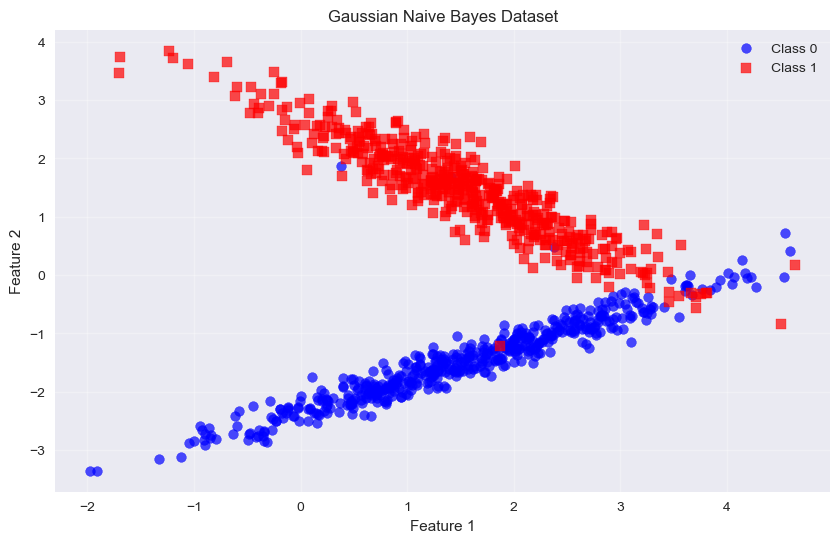

In [4]:
# 5.1 Generate data for Gaussian Naive Bayes
np.random.seed(42)

# Create a dataset with continuous features
X_gaussian, y_gaussian = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,random_state=42,class_sep=1.5)

# Create DataFrame for better visualization
df_gaussian = pd.DataFrame(X_gaussian, columns=['Feature_1', 'Feature_2'])
df_gaussian['Class'] = y_gaussian

print(f"Gaussian dataset shape: {X_gaussian.shape}")
print(f"Class distribution: {np.bincount(y_gaussian)}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_gaussian[y_gaussian==0, 0], X_gaussian[y_gaussian==0, 1], c='blue', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X_gaussian[y_gaussian==1, 0], X_gaussian[y_gaussian==1, 1], c='red', marker='s', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Naive Bayes Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Text dataset shape: (15, 85)
Class distribution: [5 5 5]
Feature names (first 10): ['ai' 'algorithms' 'american' 'analysis' 'artificial' 'athletes' 'aws'
 'azure' 'baseball' 'basketball']


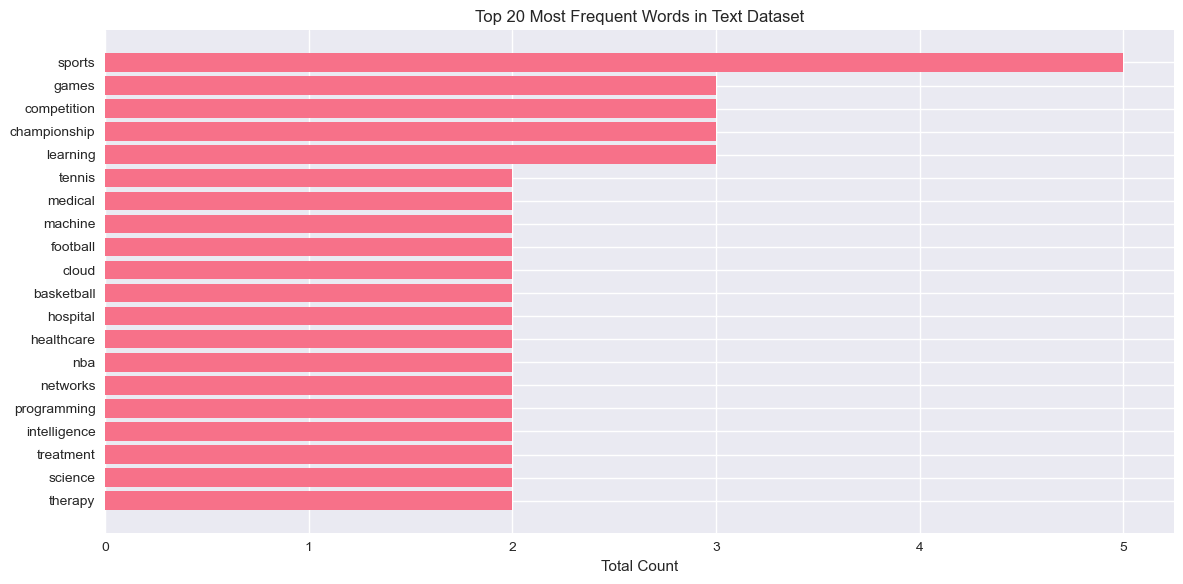

In [5]:
# 5.2 Generate text data for Multinomial Naive Bayes
# Create sample text data for document classification

documents = [
    # Technology documents
    "machine learning artificial intelligence data science algorithms neural networks",
    "python programming software development coding computer science technology",
    "deep learning tensorflow keras neural networks machine learning AI",
    "database management SQL programming data analysis business intelligence",
    "cloud computing AWS azure microsoft google cloud platform infrastructure",
    
    # Sports documents  
    "football soccer basketball tennis sports games championship tournament",
    "olympic games athletes competition running swimming cycling sports",
    "baseball american football NFL NBA sports league championship",
    "tennis grand slam wimbledon sports competition athletes",
    "basketball NBA playoffs championship sports competition games",
    
    # Health documents
    "medicine healthcare hospital doctor patient treatment therapy",
    "nutrition diet healthy eating exercise fitness wellness lifestyle",
    "medical research clinical trials drug development pharmaceutical",
    "mental health psychology therapy counseling wellness support",
    "surgery medical procedure hospital treatment recovery healthcare"
]

labels_text = [ 0, 0, 0, 0, 0,  # Technology
                1, 1, 1, 1, 1,  # Sports  
                2, 2, 2, 2, 2]  # Health

# Convert text to features using CountVectorizer for Multinomial NB
vectorizer = CountVectorizer(max_features=100, stop_words='english')
X_text = vectorizer.fit_transform(documents)
y_text = np.array(labels_text)

print(f"Text dataset shape: {X_text.shape}")
print(f"Class distribution: {np.bincount(y_text)}")
print(f"Feature names (first 10): {vectorizer.get_feature_names_out()[:10]}")

# Visualize feature distribution
plt.figure(figsize=(12, 6))
feature_sums = np.array(X_text.sum(axis=0)).flatten()
top_features_idx = np.argsort(feature_sums)[-20:]
top_features = vectorizer.get_feature_names_out()[top_features_idx]

plt.barh(range(len(top_features)), feature_sums[top_features_idx])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Total Count')
plt.title('Top 20 Most Frequent Words in Text Dataset')
plt.tight_layout()
plt.show()

## **6. Implementation from Scratch**

Let's implement Gaussian Naive Bayes from scratch to understand the algorithm better.

In [ ]:
class GaussianNaiveBayesFromScratch:
    """
    Gaussian Naive Bayes implementation from scratch
    """
    
    def __init__(self):
        self.classes = None
        self.class_priors = {}
        self.feature_params = {}  # Store mean and std for each feature per class
    
    def fit(self, X, y):
        """
        Fit the Gaussian Naive Bayes model
        
        Parameters:
        X: Training features
        y: Training labels
        """
        self.classes = np.unique(y)
        n_samples = X.shape[0]
        
        # Calculate class priors P(y)
        for class_val in self.classes:
            class_count = np.sum(y == class_val)
            self.class_priors[class_val] = class_count / n_samples
            
        # Calculate feature parameters (mean and std) for each class
        for class_val in self.classes:
            class_mask = (y == class_val)
            X_class = X[class_mask]
            
            # Calculate mean and std for each feature
            means = np.mean(X_class, axis=0)
            stds = np.std(X_class, axis=0)
            
            # Handle zero standard deviation
            stds = np.where(stds == 0, 1e-6, stds)
            
            self.feature_params[class_val] = {
                'mean': means,
                'std': stds
            }
    
    def _gaussian_probability(self, x, mean, std):
        """
        Calculate Gaussian probability density
        """
        exponent = -0.5 * ((x - mean) / std) ** 2
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)
    
    def _predict_single(self, x):
        """
        Predict class for a single sample
        """
        class_scores = {}
        
        for class_val in self.classes:
            # Start with class prior
            score = np.log(self.class_priors[class_val])
            
            # Add likelihood for each feature
            mean = self.feature_params[class_val]['mean']
            std = self.feature_params[class_val]['std']
            
            # Calculate log likelihood for numerical stability
            likelihood = self._gaussian_probability(x, mean, std)
            score += np.sum(np.log(likelihood + 1e-10))  # Add small epsilon to avoid log(0)
            
            class_scores[class_val] = score
            
        # Return class with highest score
        return max(class_scores, key=class_scores.get)
    
    def predict(self, X):
        """
        Predict classes for multiple samples
        """
        predictions = []
        for x in X:
            predictions.append(self._predict_single(x))
        return np.array(predictions)
    
    def predict_proba(self, X):
        """
        Predict class probabilities
        """
        probabilities = []
        
        for x in X:
            class_scores = {}
            
            for class_val in self.classes:
                # Calculate log probability
                score = np.log(self.class_priors[class_val])
                mean = self.feature_params[class_val]['mean']
                std = self.feature_params[class_val]['std']
                
                likelihood = self._gaussian_probability(x, mean, std)
                score += np.sum(np.log(likelihood + 1e-10))
                
                class_scores[class_val] = score
            
            # Convert log probabilities to probabilities using softmax
            max_score = max(class_scores.values())
            exp_scores = {k: np.exp(v - max_score) for k, v in class_scores.items()}
            total = sum(exp_scores.values())
            proba = {k: v / total for k, v in exp_scores.items()}
            
            # Convert to array in class order
            proba_array = [proba[class_val] for class_val in self.classes]
            probabilities.append(proba_array)
            
        return np.array(probabilities)

# Test our implementation
print("Testing Gaussian Naive Bayes from scratch...")

Testing Gaussian Naive Bayes from scratch...


Accuracy (from scratch): 0.9650
Accuracy (scikit-learn): 0.9650
Difference: 0.000000


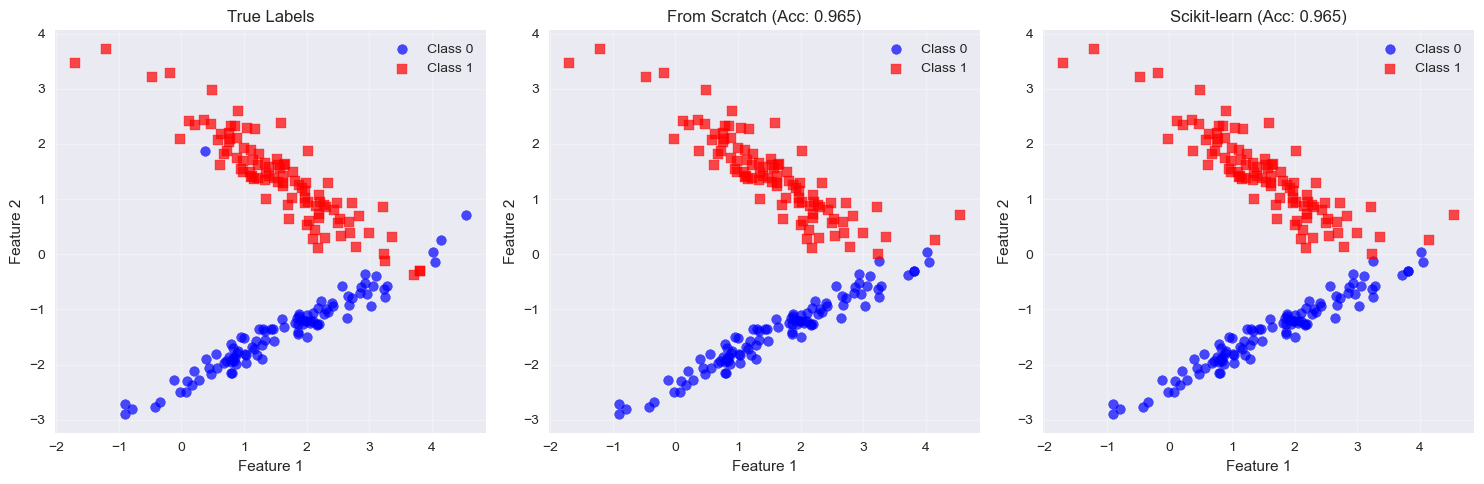

In [7]:
# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X_gaussian, y_gaussian, test_size=0.2, random_state=42, stratify=y_gaussian)

# Train our implementation
nb_scratch = GaussianNaiveBayesFromScratch()
nb_scratch.fit(X_train, y_train)

# Make predictions
y_pred_scratch = nb_scratch.predict(X_test)
y_proba_scratch = nb_scratch.predict_proba(X_test)

# Evaluate
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Accuracy (from scratch): {accuracy_scratch:.4f}")

# Compare with scikit-learn
nb_sklearn = GaussianNB()
nb_sklearn.fit(X_train, y_train)
y_pred_sklearn = nb_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Accuracy (scikit-learn): {accuracy_sklearn:.4f}")
print(f"Difference: {abs(accuracy_scratch - accuracy_sklearn):.6f}")

# Visualize predictions
plt.figure(figsize=(15, 5))

# Plot 1: Original data
plt.subplot(1, 3, 1)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='red', marker='s', alpha=0.7, label='Class 1')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Our implementation
plt.subplot(1, 3, 2)
plt.scatter(X_test[y_pred_scratch==0, 0], X_test[y_pred_scratch==0, 1], c='blue', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X_test[y_pred_scratch==1, 0], X_test[y_pred_scratch==1, 1], c='red', marker='s', alpha=0.7, label='Class 1')
plt.title(f'From Scratch (Acc: {accuracy_scratch:.3f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Scikit-learn
plt.subplot(1, 3, 3)
plt.scatter(X_test[y_pred_sklearn==0, 0], X_test[y_pred_sklearn==0, 1], c='blue', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X_test[y_pred_sklearn==1, 0], X_test[y_pred_sklearn==1, 1], c='red', marker='s', alpha=0.7, label='Class 1')
plt.title(f'Scikit-learn (Acc: {accuracy_sklearn:.3f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **7. Scikit-learn Implementation**

Let's explore all the different Naive Bayes variants available in scikit-learn.

In [9]:
# 7.1 Gaussian Naive Bayes for continuous features
print("=== Gaussian Naive Bayes ===")

# Split the data
X_train_gauss, X_test_gauss, y_train_gauss, y_test_gauss = train_test_split(X_gaussian, y_gaussian, test_size=0.2, random_state=42, stratify=y_gaussian)

# Initialize and train
gnb = GaussianNB()
gnb.fit(X_train_gauss, y_train_gauss)

# Predictions
y_pred_gauss = gnb.predict(X_test_gauss)
y_proba_gauss = gnb.predict_proba(X_test_gauss)

# Evaluation
print(f"Accuracy : {accuracy_score(y_test_gauss, y_pred_gauss):.4f}")
print(f"Precision: {precision_score(y_test_gauss, y_pred_gauss, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test_gauss, y_pred_gauss, average='weighted'):.4f}")
print(f"F1-Score : {f1_score(y_test_gauss, y_pred_gauss, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_gauss, y_pred_gauss))

# 7.2 Multinomial Naive Bayes for text data
print("\n=== Multinomial Naive Bayes ===")

# Split text data
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y_text, test_size=0.3, random_state=42, stratify=y_text)

# Initialize and train
mnb = MultinomialNB(alpha=1.0)  # alpha is the smoothing parameter
mnb.fit(X_train_text, y_train_text)

# Predictions
y_pred_text  = mnb.predict(X_test_text)
y_proba_text = mnb.predict_proba(X_test_text)

# Evaluation
print(f"Accuracy : {accuracy_score(y_test_text, y_pred_text):.4f}")
print(f"Precision: {precision_score(y_test_text, y_pred_text, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test_text, y_pred_text, average='weighted'):.4f}")
print(f"F1-Score : {f1_score(y_test_text, y_pred_text, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_text, y_pred_text, target_names=['Technology', 'Sports', 'Health']))

=== Gaussian Naive Bayes ===
Accuracy : 0.9650
Precision: 0.9650
Recall   : 0.9650
F1-Score : 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.97      0.96      0.96       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200


=== Multinomial Naive Bayes ===
Accuracy : 0.6000
Precision: 0.6000
Recall   : 0.6000
F1-Score : 0.6000

Classification Report:
              precision    recall  f1-score   support

  Technology       0.00      0.00      0.00         1
      Sports       1.00      1.00      1.00         2
      Health       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.50      0.50      0.50         5
weighted avg       0.60      0.60      0.60         5




=== Bernoulli Naive Bayes ===
Accuracy: 0.8000
F1-Score: 0.8000

=== Complement Naive Bayes ===
Accuracy: 0.6000
F1-Score: 0.6000

=== Model Comparison on Text Data ===
Multinomial NB: 0.6000
Bernoulli NB: 0.8000
Complement NB: 0.6000


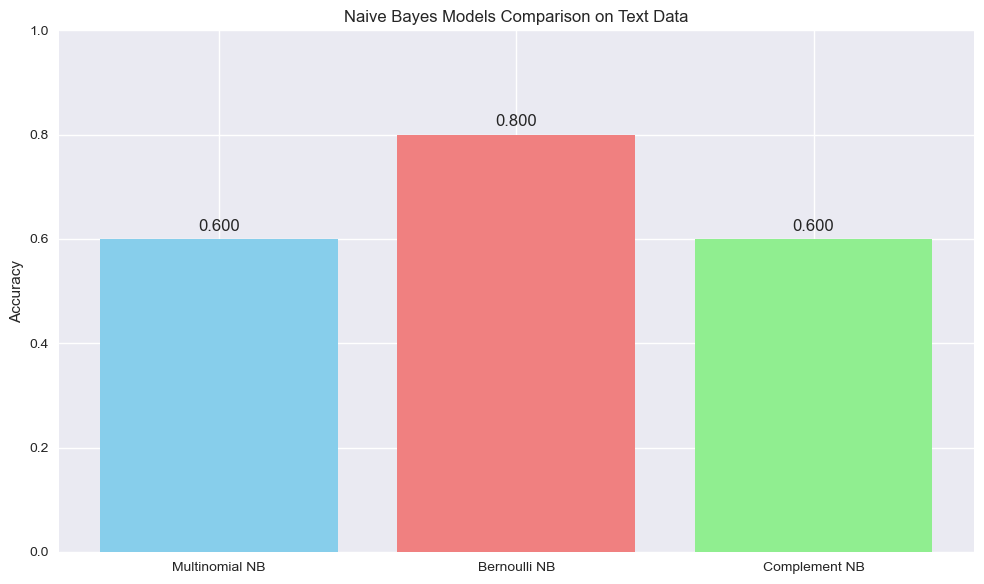

In [10]:
# 7.3 Bernoulli Naive Bayes for binary features
print("\n=== Bernoulli Naive Bayes ===")

# Convert text data to binary (presence/absence of words)
X_binary = (X_text > 0).astype(int)
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_text, test_size=0.3, random_state=42, stratify=y_text)

# Initialize and train
bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train_binary, y_train_binary)

# Predictions
y_pred_binary = bnb.predict(X_test_binary)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred_binary):.4f}")
print(f"F1-Score: {f1_score(y_test_binary, y_pred_binary, average='weighted'):.4f}")

# 7.4 Complement Naive Bayes (good for imbalanced datasets)
print("\n=== Complement Naive Bayes ===")

# Initialize and train
cnb = ComplementNB(alpha=1.0)
cnb.fit(X_train_text, y_train_text)

# Predictions
y_pred_complement = cnb.predict(X_test_text)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test_text, y_pred_complement):.4f}")
print(f"F1-Score: {f1_score(y_test_text, y_pred_complement, average='weighted'):.4f}")

# 7.5 Compare all models
print("\n=== Model Comparison on Text Data ===")
models_comparison = {
    'Multinomial NB': accuracy_score(y_test_text, y_pred_text),
    'Bernoulli NB': accuracy_score(y_test_binary, y_pred_binary),
    'Complement NB': accuracy_score(y_test_text, y_pred_complement)
}

for model, acc in models_comparison.items():
    print(f"{model}: {acc:.4f}")

# Visualize comparison
plt.figure(figsize=(10, 6))
models = list(models_comparison.keys())
accuracies = list(models_comparison.values())

bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Naive Bayes Models Comparison on Text Data')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **8. Model Comparison and Visualization**

Let's create comprehensive visualizations to understand model behavior and decision boundaries.

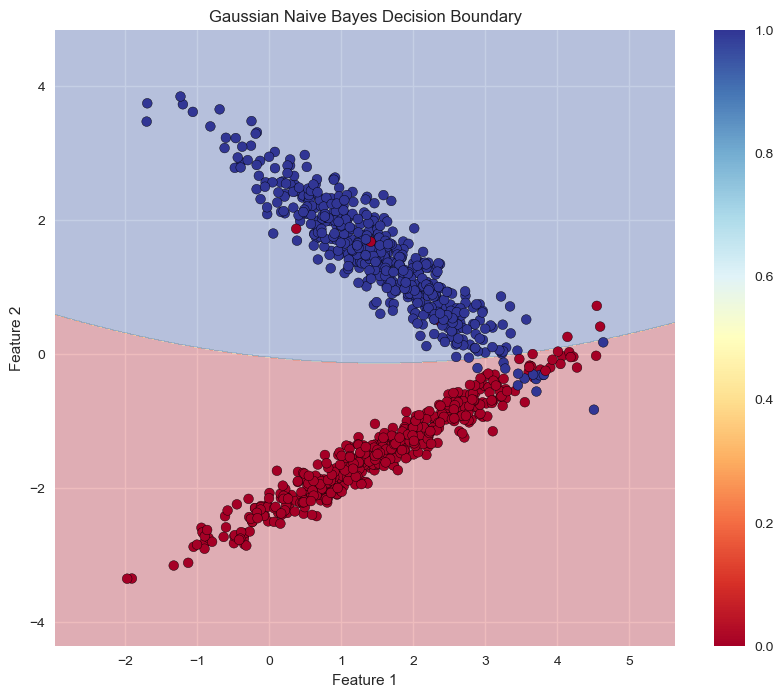

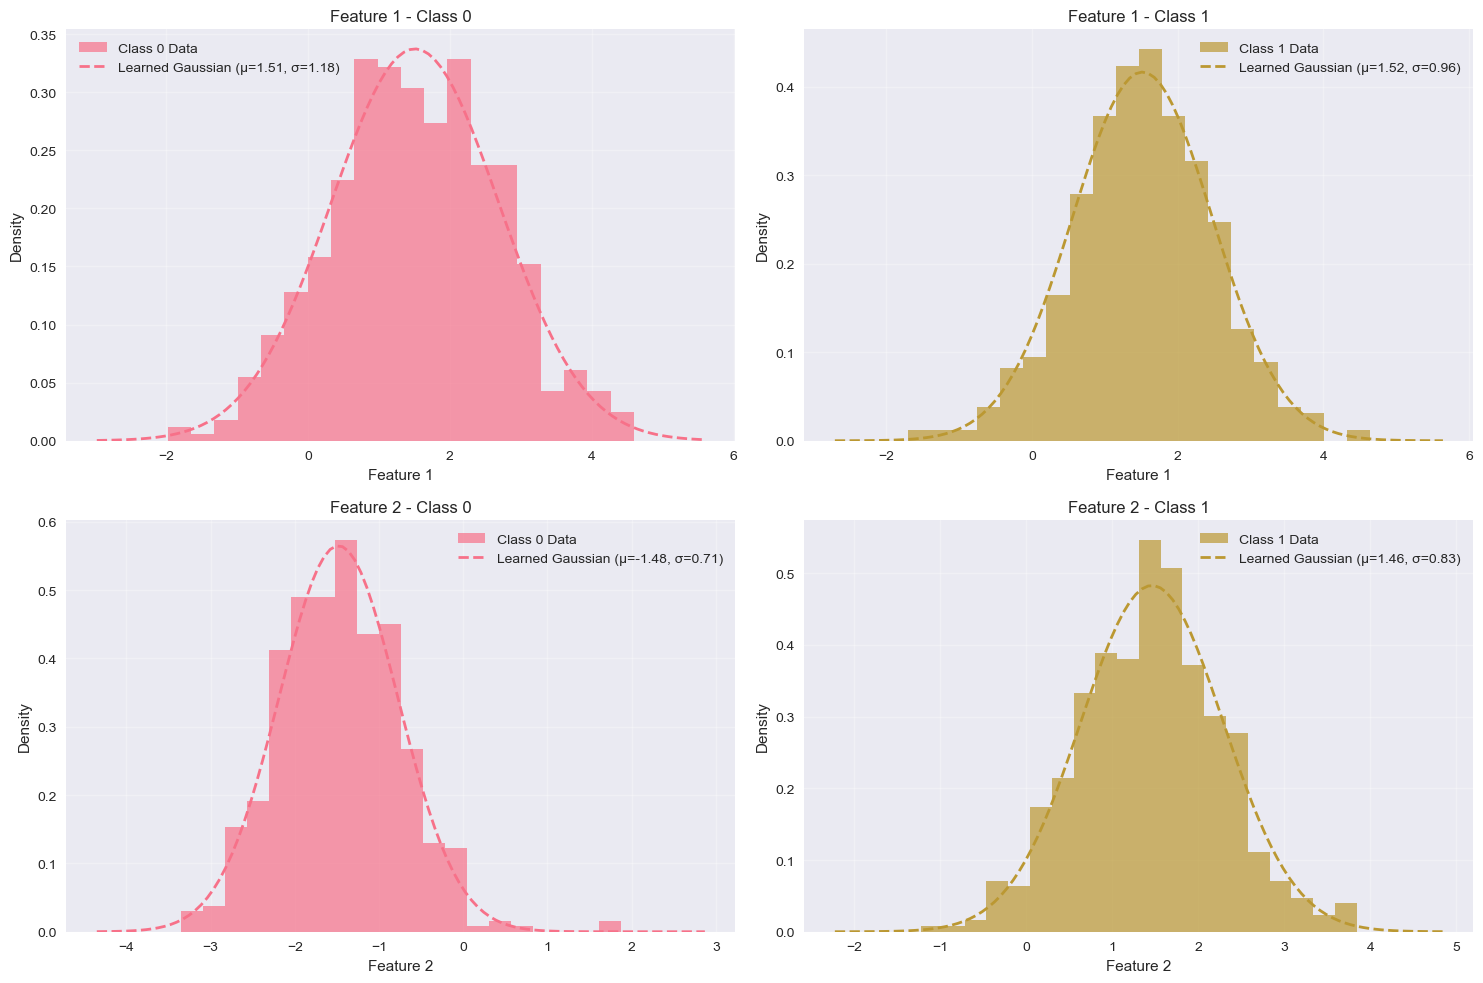

In [11]:
# 8.1 Decision Boundary Visualization for Gaussian Naive Bayes
def plot_decision_boundary(X, y, classifier, title):
        """Plot decision boundary for 2D data"""
        h = 0.01  # step size in mesh
        
        # Create a mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        
        # Make predictions on mesh
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = classifier.predict(mesh_points)
        Z = Z.reshape(xx.shape)
        
        # Plot
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        
        # Plot data points
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        plt.colorbar(scatter)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(title)
        plt.show()

# Plot decision boundary for Gaussian NB
plot_decision_boundary(X_gaussian, y_gaussian, gnb, 'Gaussian Naive Bayes Decision Boundary')

# 8.2 Probability Distribution Visualization
plt.figure(figsize=(15, 10))

# For each class and feature, plot the learned Gaussian distributions
classes = np.unique(y_gaussian)
features = ['Feature 1', 'Feature 2']

for i, feature_idx in enumerate([0, 1]):
        for j, class_val in enumerate(classes):
                plt.subplot(2, 2, i*2 + j + 1)
                
                # Get data for this class and feature
                class_data = X_gaussian[y_gaussian == class_val, feature_idx]
                
                # Get learned parameters
                mean = gnb.theta_[class_val, feature_idx]
                std = np.sqrt(gnb.var_[class_val, feature_idx])
                
                # Plot histogram of actual data
                plt.hist(class_data, bins=20, alpha=0.7, density=True, 
                        label=f'Class {class_val} Data', color=f'C{class_val}')
                
                # Plot learned Gaussian
                x_range = np.linspace(class_data.min() - 1, class_data.max() + 1, 100)
                gaussian_curve = stats.norm.pdf(x_range, mean, std)
                plt.plot(x_range, gaussian_curve, linewidth=2, 
                        label=f'Learned Gaussian (μ={mean:.2f}, σ={std:.2f})',
                        color=f'C{class_val}', linestyle='--')
                
                plt.xlabel(features[i])
                plt.ylabel('Density')
                plt.title(f'{features[i]} - Class {class_val}')
                plt.legend()
                plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

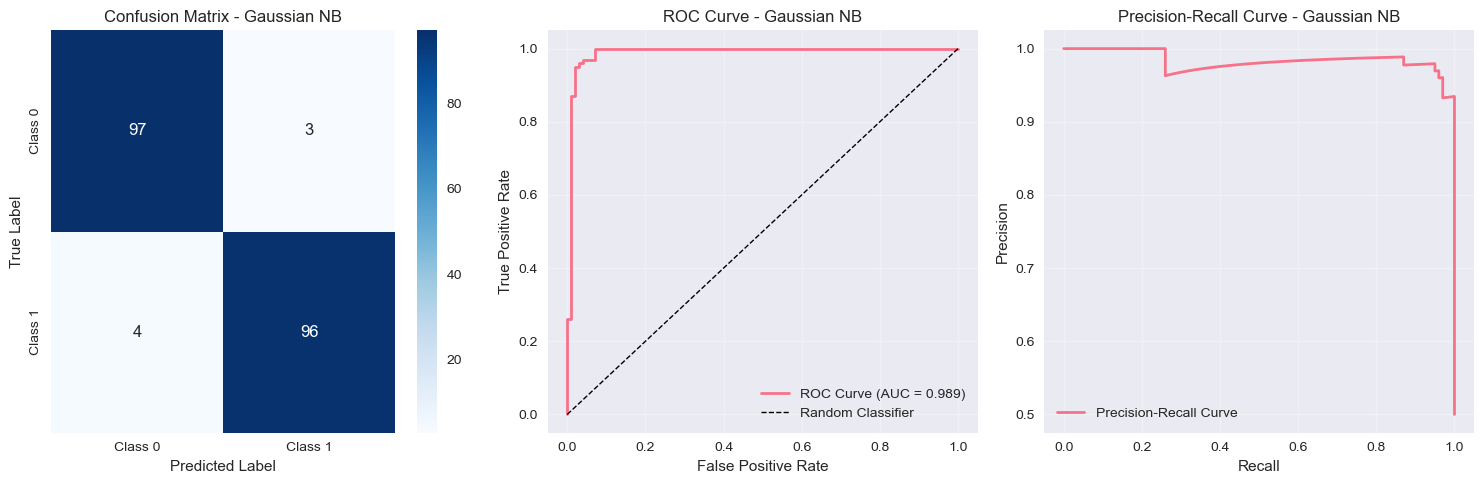

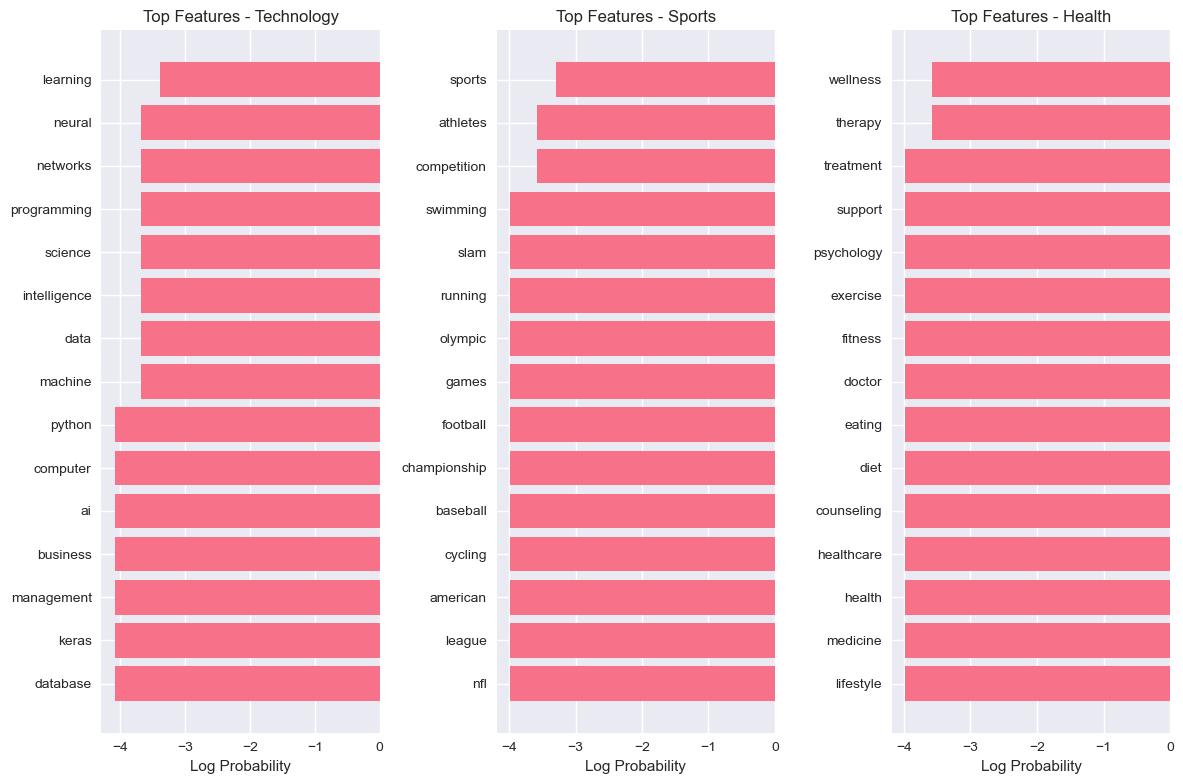

In [12]:
# 8.3 Confusion Matrix and ROC Curve
plt.figure(figsize=(15, 5))

# Confusion Matrix for Gaussian NB
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test_gauss, y_pred_gauss)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Gaussian NB')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve for Gaussian NB
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test_gauss, y_proba_gauss[:, 1])
auc_score = roc_auc_score(y_test_gauss, y_proba_gauss[:, 1])

plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian NB')
plt.legend()
plt.grid(True, alpha=0.3)

# Precision-Recall Curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test_gauss, y_proba_gauss[:, 1])
plt.plot(recall, precision, linewidth=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gaussian NB')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8.4 Feature Importance for Text Classification
plt.figure(figsize=(12, 8))

# Get feature log probabilities for each class in Multinomial NB
feature_names = vectorizer.get_feature_names_out()
n_features_to_show = 15

for i, class_name in enumerate(['Technology', 'Sports', 'Health']):
    plt.subplot(1, 3, i+1)
    
    # Get top features for this class
    feature_log_prob = mnb.feature_log_prob_[i]
    top_features_idx = np.argsort(feature_log_prob)[-n_features_to_show:]
    top_features = feature_names[top_features_idx]
    top_scores = feature_log_prob[top_features_idx]
    
    # Plot
    plt.barh(range(len(top_features)), top_scores)
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel('Log Probability')
    plt.title(f'Top Features - {class_name}')
    plt.tight_layout()

plt.show()

## **9. Hyperparameter Tuning**

Naive Bayes has relatively few hyperparameters, but tuning them can improve performance.

=== Hyperparameter Tuning for Multinomial Naive Bayes ===
Best parameters: {'alpha': 0.01, 'fit_prior': True}
Best cross-validation score: 1.0000
Test accuracy: 0.6000


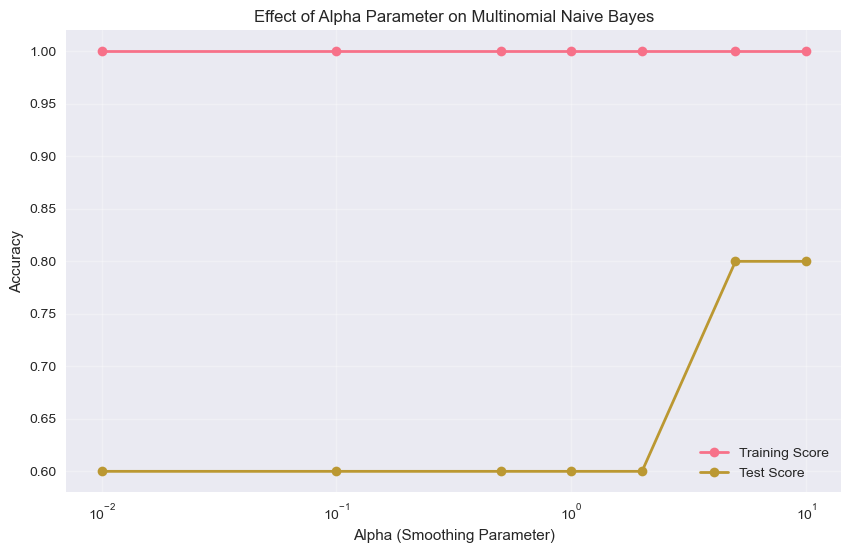

Optimal alpha value: 5.0

=== Cross-Validation Analysis ===
CV Scores: [1. 1. 1.]
Mean CV Score: 1.0000 (+/- 0.0000)

=== Hyperparameter Tuning for Gaussian Naive Bayes ===
Best parameters: {'var_smoothing': 1e-10}
Best cross-validation score: 0.9800
Test accuracy: 0.9650


In [15]:
# 9.1 Hyperparameter Tuning for Multinomial Naive Bayes
print("=== Hyperparameter Tuning for Multinomial Naive Bayes ===")

# Define parameter grid
param_grid_mnb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Grid search with cross-validation (reduced splits due to small dataset)
mnb_grid = GridSearchCV(
    MultinomialNB(), 
    param_grid_mnb, 
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1
)

# Fit grid search
mnb_grid.fit(X_train_text, y_train_text)

print(f"Best parameters: {mnb_grid.best_params_}")
print(f"Best cross-validation score: {mnb_grid.best_score_:.4f}")

# Test the best model
best_mnb = mnb_grid.best_estimator_
y_pred_best_mnb = best_mnb.predict(X_test_text)
print(f"Test accuracy: {accuracy_score(y_test_text, y_pred_best_mnb):.4f}")

# 9.2 Visualize the effect of alpha (smoothing parameter)
alphas = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
train_scores = []
test_scores  = []

for alpha in alphas:
    mnb_temp = MultinomialNB(alpha=alpha)
    mnb_temp.fit(X_train_text, y_train_text)
    
    train_score = mnb_temp.score(X_train_text, y_train_text)
    test_score = mnb_temp.score(X_test_text, y_test_text)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores, 'o-', label='Training Score', linewidth=2)
plt.semilogx(alphas, test_scores, 'o-', label='Test Score', linewidth=2)
plt.xlabel('Alpha (Smoothing Parameter)')
plt.ylabel('Accuracy')
plt.title('Effect of Alpha Parameter on Multinomial Naive Bayes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Optimal alpha value: {alphas[np.argmax(test_scores)]}")

# 9.3 Cross-validation analysis
cv_scores = cross_val_score(best_mnb, X_train_text, y_train_text, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42))

print(f"\n=== Cross-Validation Analysis ===")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 9.4 Hyperparameter Tuning for Gaussian Naive Bayes
print("\n=== Hyperparameter Tuning for Gaussian Naive Bayes ===")

# Gaussian NB has fewer hyperparameters to tune
param_grid_gnb = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]  # Smoothing parameter
}

gnb_grid = GridSearchCV(
    GaussianNB(), 
    param_grid_gnb, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1
)

gnb_grid.fit(X_train_gauss, y_train_gauss)

print(f"Best parameters: {gnb_grid.best_params_}")
print(f"Best cross-validation score: {gnb_grid.best_score_:.4f}")

# Test the best model
best_gnb = gnb_grid.best_estimator_
y_pred_best_gnb = best_gnb.predict(X_test_gauss)
print(f"Test accuracy: {accuracy_score(y_test_gauss, y_pred_best_gnb):.4f}")

## **10. Real-world Applications**

Let's implement a practical spam email detection system using Naive Bayes.

=== Spam Email Detection System ===
Total emails: 20
Spam emails: 10
Legitimate emails: 10

=== Model Performance Comparison ===

Multinomial NB:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Bernoulli NB:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Complement NB:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000


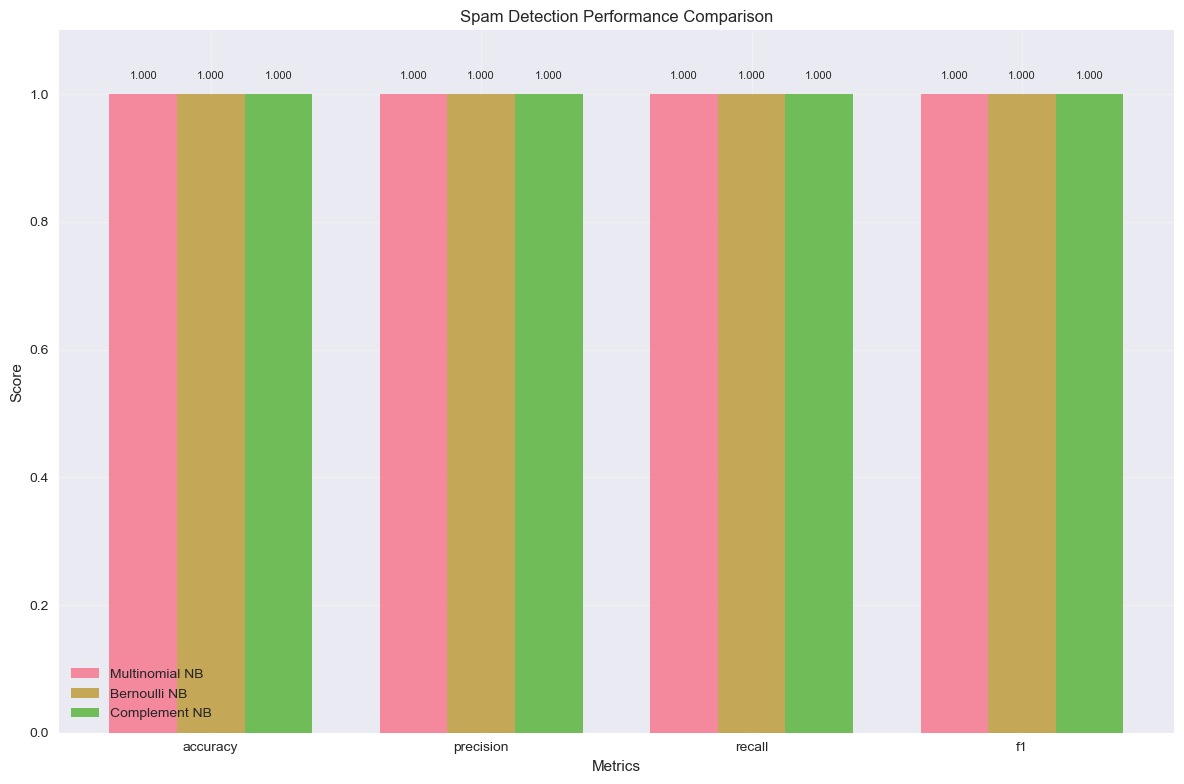

In [16]:
# 10.1 Spam Email Detection System
print("=== Spam Email Detection System ===")

# Create a realistic spam detection dataset
spam_emails = [
    "URGENT! You've won $1000000! Click here now to claim your prize!",
    "FREE MONEY! Limited time offer! Call now! Don't miss out!",
    "Congratulations! You're our lucky winner! Claim your reward immediately!",
    "MAKE MONEY FAST! Work from home! Guaranteed income!",
    "VIAGRA cheap! Best prices! No prescription needed!",
    "Win big! Casino bonus! Play now and get rich quick!",
    "Lose weight fast! Amazing diet pills! Order today!",
    "Nigerian prince needs help transferring money. Share profits!",
    "Your credit card has been charged. Click to dispute charges.",
    "Urgent security alert! Your account will be closed! Act now!"
]

legitimate_emails = [
    "Hi John, hope you're doing well. Let's schedule our meeting for next week.",
    "Thank you for your presentation yesterday. The team found it very informative.",
    "Reminder: Your subscription expires next month. Please renew at your convenience.",
    "Welcome to our newsletter! We'll send you updates about our products monthly.",
    "Your order has been shipped. You can track it using the provided tracking number.",
    "Meeting agenda for tomorrow: budget review, project updates, and team announcements.",
    "Happy birthday! Hope you have a wonderful day with your family and friends.",
    "Conference call scheduled for 3 PM. Please dial in using the conference bridge.",
    "Thank you for choosing our service. Your satisfaction is important to us.",
    "Don't forget to submit your expense report by Friday end of business."
]

# Combine emails and create labels
all_emails = spam_emails + legitimate_emails
email_labels = [1] * len(spam_emails) + [0] * len(legitimate_emails)  # 1 = spam, 0 = legitimate

print(f"Total emails: {len(all_emails)}")
print(f"Spam emails: {sum(email_labels)}")
print(f"Legitimate emails: {len(email_labels) - sum(email_labels)}")

# Convert emails to feature vectors
email_vectorizer = TfidfVectorizer(max_features=100, stop_words='english', lowercase=True)
X_emails = email_vectorizer.fit_transform(all_emails)

# Split the data
X_train_email, X_test_email, y_train_email, y_test_email = train_test_split(X_emails, email_labels, test_size=0.3, random_state=42, stratify=email_labels)

# Train different Naive Bayes models
models = {
    'Multinomial NB': MultinomialNB(alpha=1.0),
    'Bernoulli NB': BernoulliNB(alpha=1.0),
    'Complement NB': ComplementNB(alpha=1.0)
}

print("\n=== Model Performance Comparison ===")
results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_email, y_train_email)
    
    # Make predictions
    y_pred = model.predict(X_test_email)
    y_proba = model.predict_proba(X_test_email)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_email, y_pred)
    precision = precision_score(y_test_email, y_pred)
    recall = recall_score(y_test_email, y_pred)
    f1 = f1_score(y_test_email, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Visualize results
metrics = ['accuracy', 'precision', 'recall', 'f1']
model_names = list(results.keys())

plt.figure(figsize=(12, 8))
x = np.arange(len(metrics))
width = 0.25

for i, model_name in enumerate(model_names):
    values = [results[model_name][metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=model_name, alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Spam Detection Performance Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, model_name in enumerate(model_names):
    values = [results[model_name][metric] for metric in metrics]
    for j, v in enumerate(values):
        plt.text(j + i*width, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

=== Email Classification Results ===

Email 1:
Text: Congratulations! You've won a free iPhone! Click here to cla...
Classification: SPAM
Confidence: 0.652
Spam Probability: 0.652

Email 2:
Text: Meeting tomorrow at 2 PM in conference room A. Please bring ...
Classification: LEGITIMATE
Confidence: 0.682
Spam Probability: 0.318

Email 3:
Text: URGENT! Your bank account will be closed! Verify your detail...
Classification: SPAM
Confidence: 0.540
Spam Probability: 0.540

Email 4:
Text: Thanks for the great dinner last night. Looking forward to o...
Classification: LEGITIMATE
Confidence: 0.629
Spam Probability: 0.371

Email 5:
Text: MAKE MONEY ONLINE! Work from home! Guaranteed $5000 per week...
Classification: SPAM
Confidence: 0.702
Spam Probability: 0.702

=== Spam Indicators Analysis ===


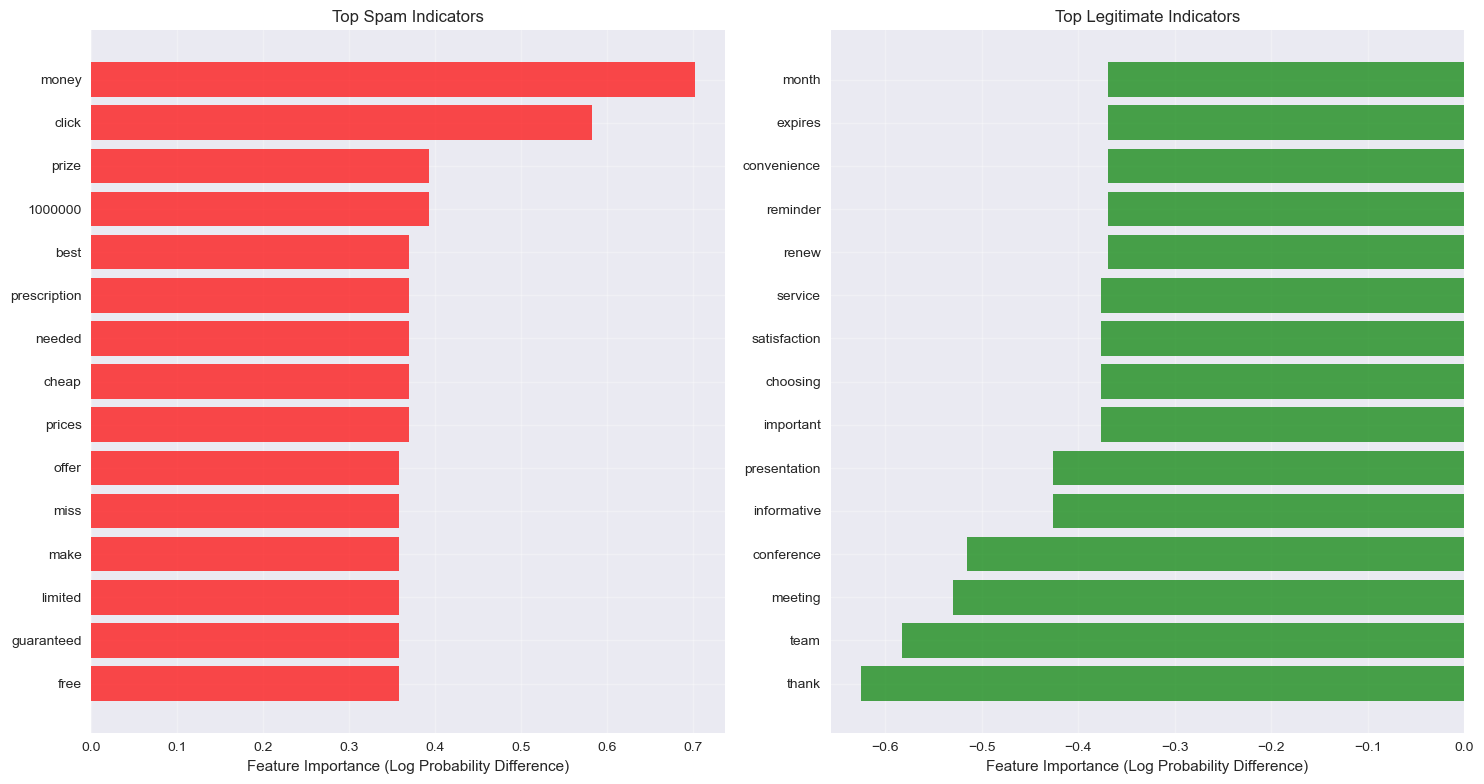

Top spam indicator words: best, 1000000, prize, click, money
Top legitimate indicator words: thank, team, meeting, conference, informative


In [17]:
# 10.2 Interactive Email Classification Function
def classify_email(email_text, model, vectorizer):
    """
    Classify a single email as spam or legitimate
    """
    # Transform the email text
    email_vector = vectorizer.transform([email_text])
    
    # Make prediction
    prediction = model.predict(email_vector)[0]
    probability = model.predict_proba(email_vector)[0]
    
    # Get confidence
    confidence = max(probability)
    
    # Return results
    result = "SPAM" if prediction == 1 else "LEGITIMATE"
    spam_prob = probability[1] if len(probability) > 1 else 0
    
    return {
        'classification': result,
        'confidence': confidence,
        'spam_probability': spam_prob
    }

# Use the best performing model (Multinomial NB from our comparison)
best_spam_model = MultinomialNB(alpha=1.0)
best_spam_model.fit(X_train_email, y_train_email)

# Test with new emails
test_emails = [
    "Congratulations! You've won a free iPhone! Click here to claim it now!",
    "Meeting tomorrow at 2 PM in conference room A. Please bring your reports.",
    "URGENT! Your bank account will be closed! Verify your details immediately!",
    "Thanks for the great dinner last night. Looking forward to our next meeting.",
    "MAKE MONEY ONLINE! Work from home! Guaranteed $5000 per week!"
]

print("=== Email Classification Results ===")
for i, email in enumerate(test_emails, 1):
    result = classify_email(email, best_spam_model, email_vectorizer)
    
    print(f"\nEmail {i}:")
    print(f"Text: {email[:60]}...")
    print(f"Classification: {result['classification']}")
    print(f"Confidence: {result['confidence']:.3f}")
    print(f"Spam Probability: {result['spam_probability']:.3f}")

# 10.3 Feature Analysis - What makes an email spam?
print("\n=== Spam Indicators Analysis ===")

# Get feature importance from the model
feature_names = email_vectorizer.get_feature_names_out()
feature_log_prob = best_spam_model.feature_log_prob_

# Calculate feature importance as difference between spam and legitimate
spam_features = feature_log_prob[1]  # Class 1 (spam)
legit_features = feature_log_prob[0]  # Class 0 (legitimate)
feature_importance = spam_features - legit_features

# Get top spam indicators
top_spam_idx = np.argsort(feature_importance)[-15:]
top_spam_words = feature_names[top_spam_idx]
top_spam_scores = feature_importance[top_spam_idx]

# Get top legitimate indicators
top_legit_idx = np.argsort(feature_importance)[:15]
top_legit_words = feature_names[top_legit_idx]
top_legit_scores = feature_importance[top_legit_idx]

plt.figure(figsize=(15, 8))

# Plot spam indicators
plt.subplot(1, 2, 1)
plt.barh(range(len(top_spam_words)), top_spam_scores, color='red', alpha=0.7)
plt.yticks(range(len(top_spam_words)), top_spam_words)
plt.xlabel('Feature Importance (Log Probability Difference)')
plt.title('Top Spam Indicators')
plt.grid(True, alpha=0.3)

# Plot legitimate indicators
plt.subplot(1, 2, 2)
plt.barh(range(len(top_legit_words)), top_legit_scores, color='green', alpha=0.7)
plt.yticks(range(len(top_legit_words)), top_legit_words)
plt.xlabel('Feature Importance (Log Probability Difference)')
plt.title('Top Legitimate Indicators')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Top spam indicator words:", ", ".join(top_spam_words[-5:]))
print("Top legitimate indicator words:", ", ".join(top_legit_words[:5]))

## **11. Advantages and Limitations**

### Advantages of Naive Bayes

#### 1. **Simplicity and Speed**
- Fast training and prediction
- Easy to understand and implement
- Low computational complexity O(n×p) where n=samples, p=features

#### 2. **Effective with Small Datasets**
- Works well with limited training data
- Less prone to overfitting compared to complex models
- Good baseline model for quick prototyping

#### 3. **Handles Multi-class Classification Naturally**
- Native support for multiple classes
- No need for one-vs-rest or one-vs-one strategies
- Provides probability estimates for each class

#### 4. **Robust to Irrelevant Features**
- Independence assumption helps ignore irrelevant features
- Works well in high-dimensional spaces (like text data)
- Feature selection less critical compared to other algorithms

#### 5. **No Hyperparameter Tuning Required**
- Performs well with default parameters
- Minimal hyperparameters to tune (mainly smoothing)
- Less risk of overfitting through hyperparameter optimization

### Limitations of Naive Bayes

#### 1. **Strong Independence Assumption**
- Assumes features are conditionally independent
- Rarely true in real-world data
- Can lead to poor performance when features are highly correlated

#### 2. **Limited Expressiveness**
- Cannot capture complex feature interactions
- Linear decision boundaries (for Gaussian NB)
- May underperform when feature relationships are important

#### 3. **Sensitive to Skewed Data**
- Can be biased toward majority classes
- Requires balanced datasets for optimal performance
- May need data balancing techniques

#### 4. **Categorical Feature Limitations**
- Gaussian NB requires continuous features
- Multinomial/Bernoulli NB work with discrete features
- Feature engineering may be needed for mixed data types

#### 5. **Zero Probability Problem**
- Unseen feature values can cause zero probabilities
- Requires smoothing (Laplace smoothing) to handle this
- Can be sensitive to the choice of smoothing parameter"

## **12. Best Practices and Summary**

### Best Practices for Naive Bayes

#### 1. **Choose the Right Variant**
- **Gaussian NB**: Continuous features that follow normal distribution
- **Multinomial NB**: Count/frequency data (text classification, word counts)
- **Bernoulli NB**: Binary features (presence/absence, binary text features)
- **Complement NB**: Imbalanced datasets, especially in text classification

#### 2. **Data Preprocessing**
```python
# Example preprocessing pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# For continuous data (Gaussian NB)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous)

# For text data (Multinomial/Bernoulli NB)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_text_features = vectorizer.fit_transform(text_data)
```

#### 3. **Handle Missing Values**
- Impute missing values before training
- Consider creating \"missing\" as a separate category for categorical features
- Use domain knowledge for appropriate imputation strategies

#### 4. **Feature Engineering**
- Create meaningful features from raw data
- Consider feature interactions if the independence assumption is too limiting
- Use domain expertise to create informative features

#### 5. **Model Validation**
- Use stratified cross-validation for imbalanced datasets
- Monitor both accuracy and class-specific metrics
- Consider using F1-score for imbalanced problems

#### 6. **Hyperparameter Tuning**
- Tune the smoothing parameter (alpha) using cross-validation
- Consider different smoothing values for different feature types
- Use grid search or random search for hyperparameter optimization

### When to Use Naive Bayes

✅ **Use Naive Bayes when:**
- You have text classification problems (spam detection, sentiment analysis)
- Working with categorical or count data
- Need a fast, interpretable baseline model
- Have limited training data
- Features are relatively independent
- Need probability estimates for predictions
- Working with high-dimensional data

❌ **Avoid Naive Bayes when:**
- Features have strong dependencies/correlations
- Need to capture complex feature interactions
- Have very small datasets with few features
- Require non-linear decision boundaries
- Features have very different scales (without preprocessing)

### Summary

Naive Bayes is a powerful and versatile family of algorithms that excel in many practical applications, particularly text classification and problems with categorical features. Despite its \"naive\" assumption of feature independence, it often performs surprisingly well in real-world scenarios.

**Key Takeaways:**

1. **Simplicity**: Easy to understand, implement, and tune
2. **Speed**: Fast training and prediction, suitable for real-time applications
3. **Effectiveness**: Particularly strong for text classification and high-dimensional data
4. **Probabilistic**: Provides meaningful probability estimates
5. **Baseline**: Excellent starting point for many classification problems

**Mathematical Foundation:**
- Based on Bayes' theorem with conditional independence assumption
- Combines prior probabilities with likelihood estimates
- Different variants handle different types of features appropriately

**Practical Applications:**
- Email spam detection
- Text classification and sentiment analysis
- Medical diagnosis systems
- News categorization
- Real-time recommendation systems

Remember that while Naive Bayes may not always achieve the highest accuracy compared to more complex models, its simplicity, interpretability, and robust performance across various domains make it an invaluable tool in the machine learning toolkit."

In [18]:
# Final Summary - Naive Bayes Complete Guide
print("🎉 Naive Bayes Complete Guide - Summary")
print("=" * 50)
print("✅ Covered all major Naive Bayes variants:")
print("   • Gaussian Naive Bayes (continuous features)")
print("   • Multinomial Naive Bayes (count/frequency data)")
print("   • Bernoulli Naive Bayes (binary features)")
print("   • Complement Naive Bayes (imbalanced datasets)")
print("\n✅ Implementation approaches:")
print("   • From scratch implementation")
print("   • Scikit-learn implementation")
print("   • Hyperparameter tuning")
print("\n✅ Practical applications:")
print("   • Email spam detection")
print("   • Text classification")
print("   • Feature importance analysis")
print("\n✅ Comprehensive analysis:")
print("   • Mathematical foundations")
print("   • Decision boundary visualization")
print("   • Performance evaluation")
print("   • Best practices and guidelines")
print("\n🚀 You're now ready to apply Naive Bayes to your own projects!")
print("Remember: Start simple, iterate, and always validate your assumptions.")
print("=" * 50)

🎉 Naive Bayes Complete Guide - Summary
✅ Covered all major Naive Bayes variants:
   • Gaussian Naive Bayes (continuous features)
   • Multinomial Naive Bayes (count/frequency data)
   • Bernoulli Naive Bayes (binary features)
   • Complement Naive Bayes (imbalanced datasets)

✅ Implementation approaches:
   • From scratch implementation
   • Scikit-learn implementation
   • Hyperparameter tuning

✅ Practical applications:
   • Email spam detection
   • Text classification
   • Feature importance analysis

✅ Comprehensive analysis:
   • Mathematical foundations
   • Decision boundary visualization
   • Performance evaluation
   • Best practices and guidelines

🚀 You're now ready to apply Naive Bayes to your own projects!
Remember: Start simple, iterate, and always validate your assumptions.
